In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import typing
from typing import Any, Dict, List, Optional
from typeguard import typechecked
import pickle
import argparse
import scipy
from utils.utils_IO import save_object, load_object
import seaborn as sns

In [2]:
os.getcwd()

'/Users/danbiderman/Dropbox/Columbia/1.Dan/Research/mormyrid-control/mrmrd_ctrl'

In [3]:
data_dict = load_object('/Volumes/sawtell-locker/C1/free/3d_reconstruction/V2/data_dict')

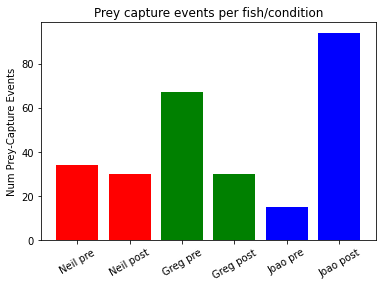

In [4]:
count = 0
color_list = ['r', 'g', 'b']
xlabel_list = []
for i, name in enumerate(data_dict["inds"].keys()):
    for j, cond in enumerate(data_dict["inds"][name].keys()):
        plt.bar(count, len(data_dict["inds"][name][cond]), color = color_list[i])
        count+=1
        xlabel_list.append(name + ' ' + cond)
plt.xticks(ticks=np.arange(count), labels = xlabel_list, rotation=30);
plt.ylabel("Num Prey-Capture Events");
plt.title('Prey capture events per fish/condition');

In [5]:
example_trial = data_dict["trials"]["Joao"]["pre"][0]
example_trial_1 = data_dict["trials"]["Joao"]["post"][0]

In [6]:
t.columns.values

NameError: name 't' is not defined

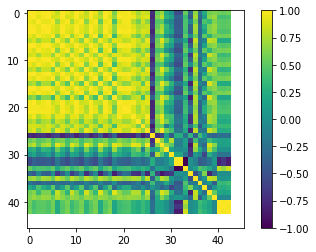

In [7]:
plt.imshow(example_trial_1.corr())
plt.colorbar()

In [77]:
fish_data = example_trial[list(example_trial.columns.levels[0][1:-5])]

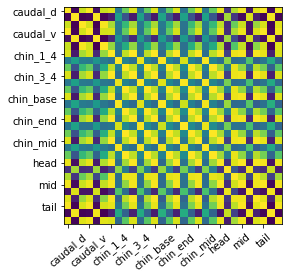

In [78]:
plt.imshow(fish_data.corr())
plt.xticks(ticks = np.arange(0, fish_data.shape[-1], 3), labels =  list(example_trial.columns.levels[0][1:-5]), rotation=40);
plt.yticks(ticks = np.arange(0, fish_data.shape[-1], 3), labels =  list(example_trial.columns.levels[0][1:-5]));

In [8]:
def plot_correlation_heatmap(corr_mat: pd.core.frame.DataFrame, labels: list[str])-> None:
    plt.imshow(corr_mat)
    plt.xticks(ticks = np.arange(0, corr_mat.shape[-1], 3), labels =  labels, rotation=40);
    plt.yticks(ticks = np.arange(0, corr_mat.shape[-1], 3), labels =  labels);

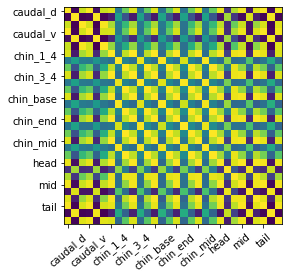

In [81]:
plot_correlation_heatmap(fish_data.corr(), list(example_trial.columns.levels[0][1:-5]))

## store an array of correlation matrices (pages: number of trials)

In [5]:
@typechecked
def make_empty_hierarchical_dict(unique_names: list, unique_conds: list)-> dict:
    trial_dict = {}
    for name in unique_names:
        trial_dict[name] = {}
        for cond in unique_conds:
            trial_dict[name][cond] = []
    return trial_dict

In [6]:
corr_dict = make_empty_hierarchical_dict(list(data_dict["trials"].keys()) ,list(data_dict["trials"]["Joao"].keys()))

In [7]:
@typechecked
def select_columns(dframe: pd.core.frame.DataFrame, names: Optional[list] = None) -> pd.core.frame.DataFrame:
    '''problem here is that is that the column names are unchanged...'''
    if names is None:
        names = list(dframe.columns.levels[0][1:-5])
    return dframe[names]

In [8]:
col_order = ['tail', 'caudal_d', 'caudal_v', 'mid', 'head', 'chin_base', 'chin_1_4', 'chin_mid', 'chin_3_4','chin_end']

In [9]:
for i, fish in enumerate(data_dict["trials"].keys()):
    for j, cond in enumerate(data_dict["trials"][fish].keys()):
        corr_dict[fish][cond] = np.zeros((30, 30, len(data_dict["trials"][fish][cond])))
        for k, trial_dframe in enumerate(data_dict["trials"][fish][cond]):
            curr_dframe = select_columns(trial_dframe)
            curr_dframe = curr_dframe[col_order] # re-order columns to emphasize chin pos
            corr_dict[fish][cond][:,:,k] = curr_dframe.corr()

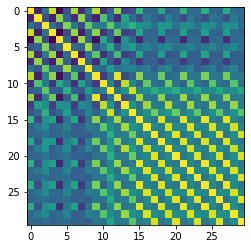

In [10]:
plt.imshow(np.nanmean(corr_dict["Neil"]["post"],-1))

In [14]:
trial_dframe.columns.levels[0][1:-5]

Index(['caudal_d', 'caudal_v', 'chin_1_4', 'chin_3_4', 'chin_base', 'chin_end',
       'chin_mid', 'head', 'mid', 'tail'],
      dtype='object')

## should we or shouldn't we use absolute value for the corrs?

In [12]:
from matplotlib import patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [16]:
test_corr_mat = np.abs(corr_dict[fish_name]["pre"][:,:, 2])
print(test_corr_mat.shape)
test_corr_mat[0:3, 0:3]

NameError: name 'fish_name' is not defined

In [237]:
extract_blocks_from_inds([0, 2], np.tile([1., 2., 3., ], (3, 1)))

[0 2 0 2]
[0 0 2 2]


array([[1., 1.],
       [3., 3.]])

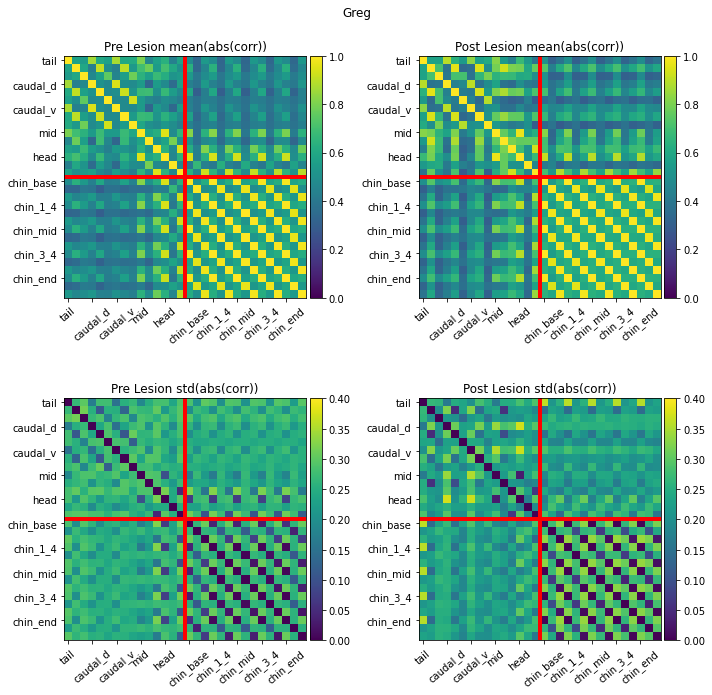

In [15]:
fish_name = "Greg"
fig, ax = plt.subplots(2,2, figsize = (10,10))
im = ax[0,0].imshow(np.nanmean(np.abs(corr_dict[fish_name]["pre"]), -1), vmin=0, vmax=1)
ax[0,0].set_title('Pre Lesion mean(abs(corr))')
im1 = ax[0,1].imshow(np.nanmean(np.abs(corr_dict[fish_name]["post"]), -1), vmin=0, vmax=1)
ax[0,1].set_title('Post Lesion mean(abs(corr))')
im2 = ax[1,0].imshow(np.nanstd(np.abs(corr_dict[fish_name]["pre"]), -1), vmin=0, vmax=.4)
ax[1,0].set_title('Pre Lesion std(abs(corr))')
im3 = ax[1,1].imshow(np.nanstd(np.abs(corr_dict[fish_name]["post"]), -1), vmin=0, vmax=.4)
ax[1,1].set_title('Post Lesion std(abs(corr))')

ax = ax.flatten()
ims = [im, im1, im2, im3]
for i, curr_ax in enumerate(ax):
    divider = make_axes_locatable(curr_ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    curr_ax.set_xticks(ticks = np.arange(0, 30, 3));
    curr_ax.set_xticklabels(labels =  col_order, rotation=40)
    curr_ax.set_yticks(ticks = np.arange(0, 30, 3));
    curr_ax.set_yticklabels(labels =  col_order)
    #rect = patches.Rectangle((15-1.5,15-1.5), 15+1, 15+1, color = 'red', fill=False, linewidth=4)
    #curr_ax.add_patch(rect)
    curr_ax.plot([0-.5, 30-1+.5], [15-.5, 15-.5], linewidth=4, color='red')
    curr_ax.plot([15-.5, 15-.5], [0-.5, 30-1+.5], linewidth=4, color='red')
    fig.colorbar(ims[i], cax=cax, orientation='vertical')
    
fig.suptitle(fish_name)
fig.tight_layout()
plt.savefig('first_pass_corrs_%s.png' % fish_name)


In [ ]:
plot_correlation_heatmap(corr_dict["Joao"]["pre"]., labels: list[str])-> None:

$$z = ax^2 +by^2 + cx + dy + e$$

let zero-mean variables:
$$
X \in \mathbb{R}^{K \times T} \\
Y \in \mathbb{R}^{L \times T} \\ 
$$
linear regression
$$
Y = \beta X + \epsilon, \quad \beta \in \mathbb{R}^{L \times K} \\
YX^T = \beta XX^T \\ 
\beta = YX^T(XX^T)^{-1}
$$
idea --> fit a linear model from all bodyparts other than the chin, to all bodyparts including the chin. do it per trial. look at the matrices.

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn.metrics import r2_score

### want:
* for every trial, predict chin using non-chin, save coeffs, compute r squared, and save. 

In [88]:
data_dict.keys()

dict_keys(['trials', 'inds', 'points_3d_paths', 'video_paths'])

In [21]:
fish_names = list(data_dict["trials"].keys())
cond_names = list(data_dict["trials"]["Joao"].keys())
beta_dict = make_empty_hierarchical_dict(fish_names, cond_names)
r_squared_dict = make_empty_hierarchical_dict(fish_names, cond_names)

print(r_squared_dict)
for i, fish in enumerate(data_dict["trials"].keys()):
    for j, cond in enumerate(data_dict["trials"][fish].keys()):
        #beta_dict[fish][cond] = np.zeros((15, 15, len(data_dict["trials"][fish][cond])))
        for k, trial_dframe in enumerate(data_dict["trials"][fish][cond]):
            curr_dframe = select_columns(trial_dframe)
            curr_dframe = curr_dframe[col_order] # re-order columns to emphasize chin pos
            inputs = curr_dframe.iloc[:, :15].to_numpy() # body coords
            outputs = curr_dframe.iloc[:, 15:].to_numpy() # chin coords
            reg = LinearRegression(fit_intercept=True).fit(inputs,outputs) # the intercept is helpful for better preds
            r_squared = reg.score(inputs, outputs)
            # save
            r_squared_dict[fish][cond].append(r_squared)
            


{'Neil': {'pre': [], 'post': []}, 'Greg': {'pre': [], 'post': []}, 'Joao': {'pre': [], 'post': []}}


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe195b9b340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe195b9ba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe195b92f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe195ba61c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe195ba6550>],
 'means': []}

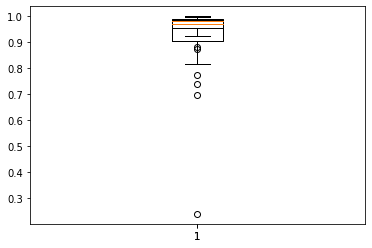

In [41]:
#compare pre and post neil
fish = "Neil"
plt.boxplot(r_squared_dict[fish]["pre"]) # np.zeros(len(r_squared_dict[fish]["pre"])), 
plt.boxplot(r_squared_dict[fish]["post"])

In [83]:
# want: column called name, column called condition, and column called r_squared
dframe_dict = pd.DataFrame(columns= ["Fish", "Lesion", "r_squared"])

dframe_dict.head()
for i, fish in enumerate(r_squared_dict.keys()):
    for j, cond in enumerate(r_squared_dict[fish].keys()):
        for k, r_sq in enumerate(r_squared_dict[fish][cond]):
            dframe_dict = dframe_dict.append({"Fish": fish, 
                            "Lesion": cond, 
                            "r_squared": r_sq}, ignore_index=True)
assert(np.max(dframe_dict["r_squared"])<1.0)

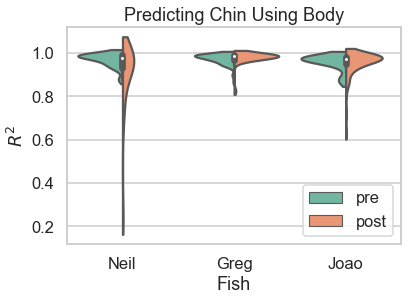

In [104]:
sns.set_context("talk")
sns.violinplot(x="Fish", y="r_squared", hue = "Lesion", palette = "Set2", split = True, cut = 1., data=dframe_dict, z_order=1)
plt.title("Predicting Chin Using Body");
plt.ylabel(r'$R^2$');
plt.legend(loc = "lower right")
plt.savefig('r_squared.png')

In [30]:
sns.violinplot([0, 1], [r_squared_dict[fish]["pre"], r_squared_dict[fish]["post"]])

/Users/danbiderman/miniconda3/envs/mrmrd_ctrl/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/danbiderman/miniconda3/envs/mrmrd_ctrl/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


TypeError: unhashable type: 'list'

In [79]:
# predict chin using other body parts
# curr_dframe.shape
inputs = curr_dframe.iloc[:, 15:]
outputs = curr_dframe.iloc[:, 15:]

In [80]:
reg = LinearRegression(fit_intercept=True).fit(predictors,predicted) # the intercept is helpful for better preds

In [81]:
#dir(reg)
r_squared = reg.score(predictors, predicted)
r_squared

1.0

In [82]:
preds = reg.predict(predictors)
preds.shape

(761, 15)

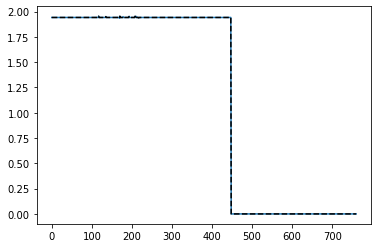

In [84]:
dim = 14
plt.plot(np.arange(preds.shape[0]), predicted.iloc[:, dim])
plt.plot(np.arange(preds.shape[0]), preds[:,dim], 'k--');

In [16]:
lengths = [dframe.shape[0] for dframe in data_dict["trials"]["Neil"]["pre"]]

In [17]:
lengths

[581,
 641,
 731,
 581,
 691,
 861,
 901,
 651,
 801,
 651,
 731,
 611,
 701,
 611,
 621,
 711,
 641,
 631,
 1251,
 1150,
 501,
 1151,
 1230,
 1138,
 1251,
 830,
 1189,
 1251,
 1007,
 1251,
 1196,
 940,
 987,
 868]

In [42]:
tips = sns.load_dataset("tips")

In [43]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
